# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df['type_enum'] = ''

enum_dict = {
    'Rural': 1,
    'Suburban': 2,
    'Urban': 3
}
# Display the data table for preview
for index, series in pyber_data_df.iterrows():
    if(series[5] in enum_dict):
        pyber_data_df['type_enum'][index] = enum_dict[series[5]]

pyber_data_df

C:\Users\YubiQuinzon\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,city,date,fare,ride_id,driver_count,type,type_enum
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,3
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,3
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,3
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,3
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,3
...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,1
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,1
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,1
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,1


In [5]:
pyber_data_df['type_enum'] = pyber_data_df['type_enum'].astype(int)

## Deliverable 1: Get a Summary DataFrame 

In [6]:
#  1. Get the total rides for each city type
pyber_data_df.groupby("type")['ride_id'].count()
city_ride_count = pyber_data_df.groupby("type")['ride_id'].count().values
city_ride_count

array([ 125,  625, 1625], dtype=int64)

In [7]:
# 2. Get the total drivers for each city type
city_driver_count = pyber_data_df.groupby("city").mean().groupby('type_enum').sum()['driver_count'].values
city_driver_count

array([  78.,  490., 2405.])

In [8]:
# Another way of doing it
pyber_data_df.groupby('city').first().groupby('type').sum()['driver_count'].values

array([  78,  490, 2405], dtype=int64)

In [9]:
#  3. Get the total amount of fares for each city type
city_fare_sum = pyber_data_df.groupby("type")['fare'].sum().values
city_fare_sum

array([ 4327.93, 19356.33, 39854.38])

In [10]:
#  4. Get the average fare per ride for each city type. 
city_fare_avg = pyber_data_df.groupby("type")['fare'].mean().values
city_fare_avg 

array([34.62344   , 30.970128  , 24.52577231])

In [11]:
# 5. Get the average fare per driver for each city type. 
avg_fare_for_type = city_fare_avg / city_driver_count
avg_fare_for_type

array([0.44389026, 0.06320434, 0.01019783])

In [12]:
#  6. Create a PyBer summary DataFrame. 
columns = ['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Driver']
indicies = ['Rural', 'Suburban', 'Urban']
pyber_sum = pd.DataFrame(columns=columns, index = indicies)
pyber_sum['Total Rides'] = city_ride_count
pyber_sum['Total Drivers'] = city_driver_count
pyber_sum['Total Fares'] = city_fare_sum
pyber_sum['Average Fare per Ride'] = city_fare_avg
pyber_sum['Average Fare per Driver'] = city_fare_sum / city_driver_count

pyber_summary_df = pyber_sum
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [13]:
#  8. Format the columns.
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,.0f}".format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("${:,.2f}".format)

In [14]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,"$4,327.93",$34.62,$55.49
Suburban,625,490.0,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405.0","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [15]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type,type_enum
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,3
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,3
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,3
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,3
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,3
...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,1
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,1
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,1
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,1


In [16]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df.groupby(['date', 'type']).sum()
df

,,fare,ride_id,driver_count,type_enum
date,type,,,,
2019-01-01 00:08:16,Urban,37.91,5673666505216,69,3
2019-01-01 00:46:46,Suburban,47.74,2215912677020,23,2
2019-01-01 02:07:24,Suburban,24.07,7827431948090,10,2
2019-01-01 03:46:50,Urban,7.57,5815378003370,64,3
2019-01-01 05:23:21,Urban,10.75,6571513080673,28,3
...,...,...,...,...,...
2019-05-08 04:20:00,Urban,21.99,117997692054,52,3
2019-05-08 04:39:49,Urban,18.45,1811574736337,11,3
2019-05-08 07:29:01,Urban,18.55,5682021476085,33,3


In [17]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()
df


,date,type,fare,ride_id,driver_count,type_enum
0,2019-01-01 00:08:16,Urban,37.91,5673666505216,69,3
1,2019-01-01 00:46:46,Suburban,47.74,2215912677020,23,2
2,2019-01-01 02:07:24,Suburban,24.07,7827431948090,10,2
3,2019-01-01 03:46:50,Urban,7.57,5815378003370,64,3
4,2019-01-01 05:23:21,Urban,10.75,6571513080673,28,3
...,...,...,...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99,117997692054,52,3
2371,2019-05-08 04:39:49,Urban,18.45,1811574736337,11,3
2372,2019-05-08 07:29:01,Urban,18.55,5682021476085,33,3
2373,2019-05-08 11:38:35,Urban,19.77,7837163332630,4,3


In [18]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df = df.pivot('date', columns='type').get(['fare'])['fare']
df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [19]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
df.loc['2019-01-01':'2019-04-28']



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [20]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df.index = pd.to_datetime(df.index)

In [21]:
# 7. Check that the datatype for the index is datetime using 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [22]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = df.resample("W").sum()
df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


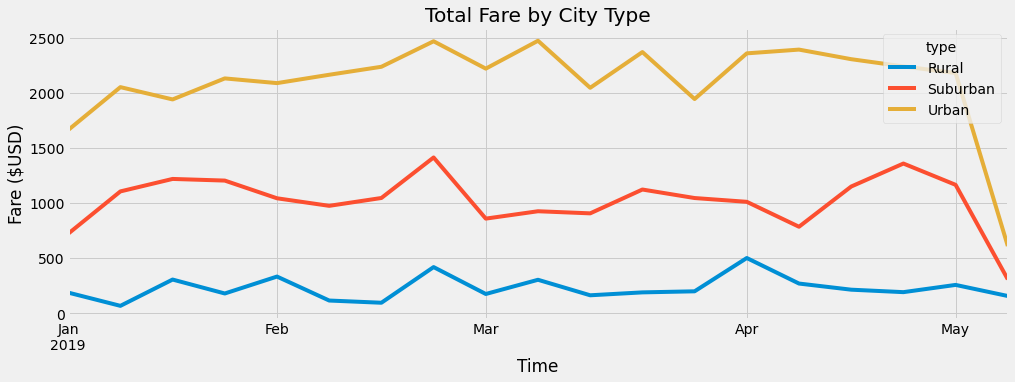

In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

df.plot(
    title = 'Total Fare by City Type',
    figsize = (15,5),
    xlabel = 'Time',
    ylabel = 'Fare ($USD)'
       )

plt.savefig("analysis/Fig8.png")
